In [6]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

import nltk

# Packages for visuals
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

from subprocess import check_output
import os
import csv

In [7]:
#Converting the data to CSV file, needs only to be done once.

from __future__ import with_statement
import contextlib

negTrainPath = "./NLPdataset/train/neg/"
posTrainPath = "./NLPdataset/train/pos/"
negTestPath = "./NLPdataset/test/neg/"
posTestPath = "./NLPdataset/test/pos/"


negTrainList = os.listdir(negTrainPath)
posTrainList = os.listdir(posTrainPath)
negTestList = os.listdir(negTestPath)
posTestList = os.listdir(posTestPath)


Xtrain=[]
Ytrain=[]
Xtest=[]
Ytest=[]

with open('csvFilesData/Sentiment.csv', 'w', newline='') as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerow(["text", "sentiment"])
           
    for file in posTestList:
        file_text = open(posTestPath + "/" + file)   
        current = [file_text.read(), "1"]
        writer.writerow(current);
        Xtest.append(current[0])
        Ytest.append(1)
        
    for file in negTestList:
        file_text = open(negTestPath + "/" + file)    
        current = [file_text.read(), "0"]
        writer.writerow(current);
        Xtest.append(current[0])
        Ytest.append(0)
        
    for file in negTrainList:
        file_text = open(negTrainPath + "/" + file)
        current = [file_text.read(), "0"]
        writer.writerow(current)
        Xtrain.append(current[0])
        Ytrain.append(0)
        
        
    for file in posTrainList:
        file_text = open(posTrainPath + "/" + file)
        current = [file_text.read(), "1"]
        writer.writerow(current);
        Xtrain.append(current[0])
        Ytrain.append(1)
        
print("Done, created Sentiment.csv file.")

Done, created Sentiment.csv file.


In [2]:
data = pd.read_csv('csvFilesData/Sentiment.csv')
data

,text,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1
5,"I saw this film on September 1st, 2005 in Indi...",1
6,"Maybe I'm reading into this too much, but I wo...",1
7,I felt this film did have many good qualities....,1
8,This movie is amazing because the fact that th...,1
9,"""Quitting"" may be as much about exiting a pre-...",1


# <b> Geting the train and the test ready</b>

In [8]:
trainv = list(zip(Xtrain,Ytrain))
testv = list(zip(Xtest,Ytest))

np.random.shuffle(trainv)
np.random.shuffle(testv)

shuffle_trainv = list(zip(*trainv))
shuffle_testv = list(zip(*testv))

# Let's Take a closer look


<b>  Analyzing </b>

First of all we are chacking how's the words on the data distribut to get some importent information how we will approach the sentiment classification. 

In [9]:
pos_train=[token for token in trainv if token[1]==1] # Choosing the Positive revriews from the train data.   
neg_train=[token for token in trainv if token[1]==0] # Choosing the Negative revriews from the train data. 


# For nice and clean workd we separating the data (reviwes) and lable (positive or negativ) to culomns 1- data 2- labels.

pos_Anz=list(zip(*pos_train))
neg_Anz=list(zip(*neg_train))

# Get pos and neg text and lables in two list.

pos_train_tokens = pos_Anz[0]
pos_train_labels = pos_Anz[1]


neg_train_tokens = neg_Anz[0]
neg_train_labels = neg_Anz[1]

# Tokenizing the all train data as one two big text (positive and negative reviwes) to get all the big picture for each.

tok_pos = "".join(pos_train_tokens)
tok_neg = "".join(neg_train_tokens)

In [10]:
stopwords_set = set(stopwords.words("english"))
stopwords_set.add(",")
stopwords_set.add(".")
stopwords_set.add("<br>")
stopwords_set.add("br")
stopwords_set.add("the")
stopwords_set.add("<")
stopwords_set.add(">")
stopwords_set.add("/")
stopwords_set.add("\\")
stopwords_set.add("'")
stopwords_set.add("''")
stopwords_set.add("!")
stopwords_set.add("?")
stopwords_set.add(":")
stopwords_set.add("&")
stopwords_set.add("br/")
stopwords_set.add("...")
stopwords_set.add("--")
stopwords_set.add("'s")
stopwords_set.add('(')
stopwords_set.add(')')
stopwords_set.add('{')
stopwords_set.add('}')
stopwords_set.add('-')
stopwords_set.add(';')
stopwords_set.add('``')
stopwords_set.add('`')
stopwords_set.add('#')
stopwords_set.add('%')
stopwords_set.add('$')
stopwords_set.add('etc.')
stopwords_set.add('etc')
stopwords_set.add("n't")

wordnet_lemmatizer = WordNetLemmatizer() 
def my_tokenizer(s):
    tokens = nltk.tokenize.word_tokenize(s.lower()) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 3] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords_set] # remove stopwords
    tokens = nltk.FreqDist(tokens)
    mostCommon= tokens.most_common(100)
    return mostCommon

# First look on the train data

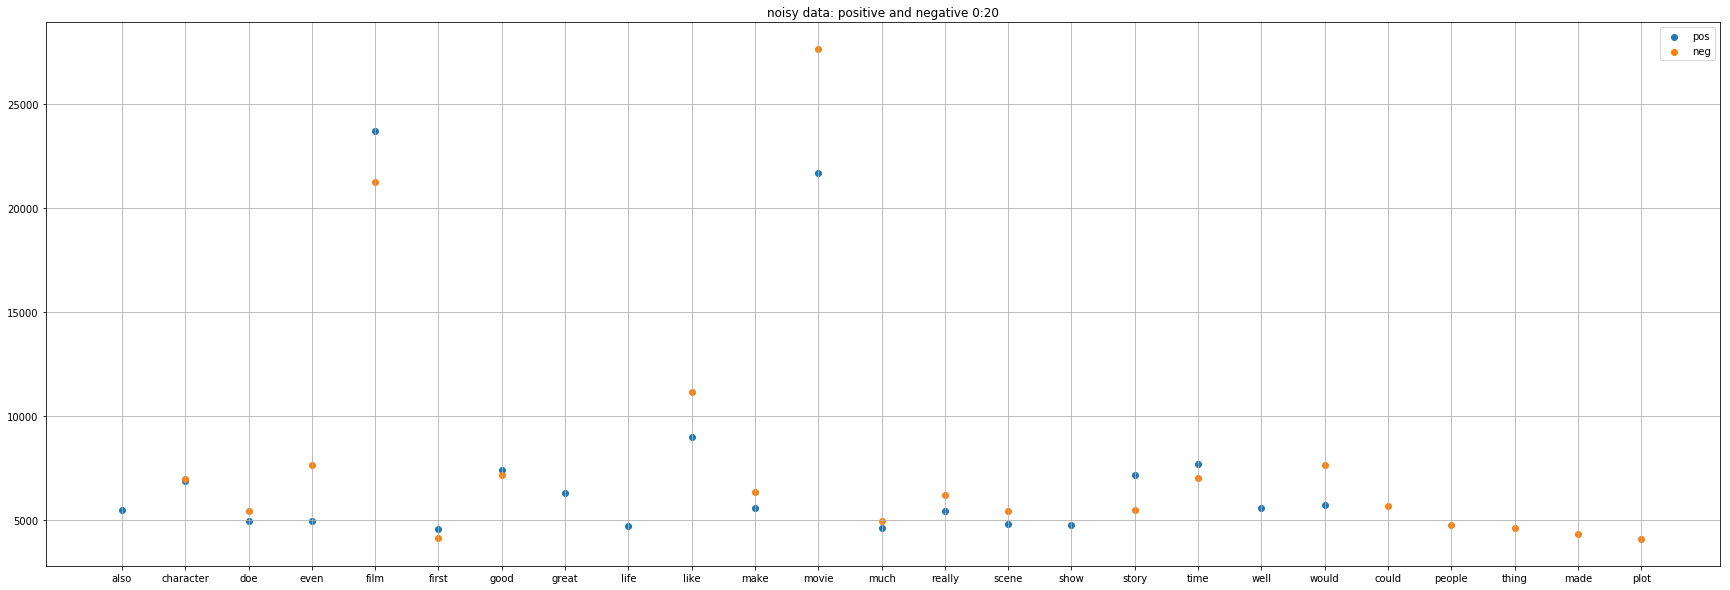

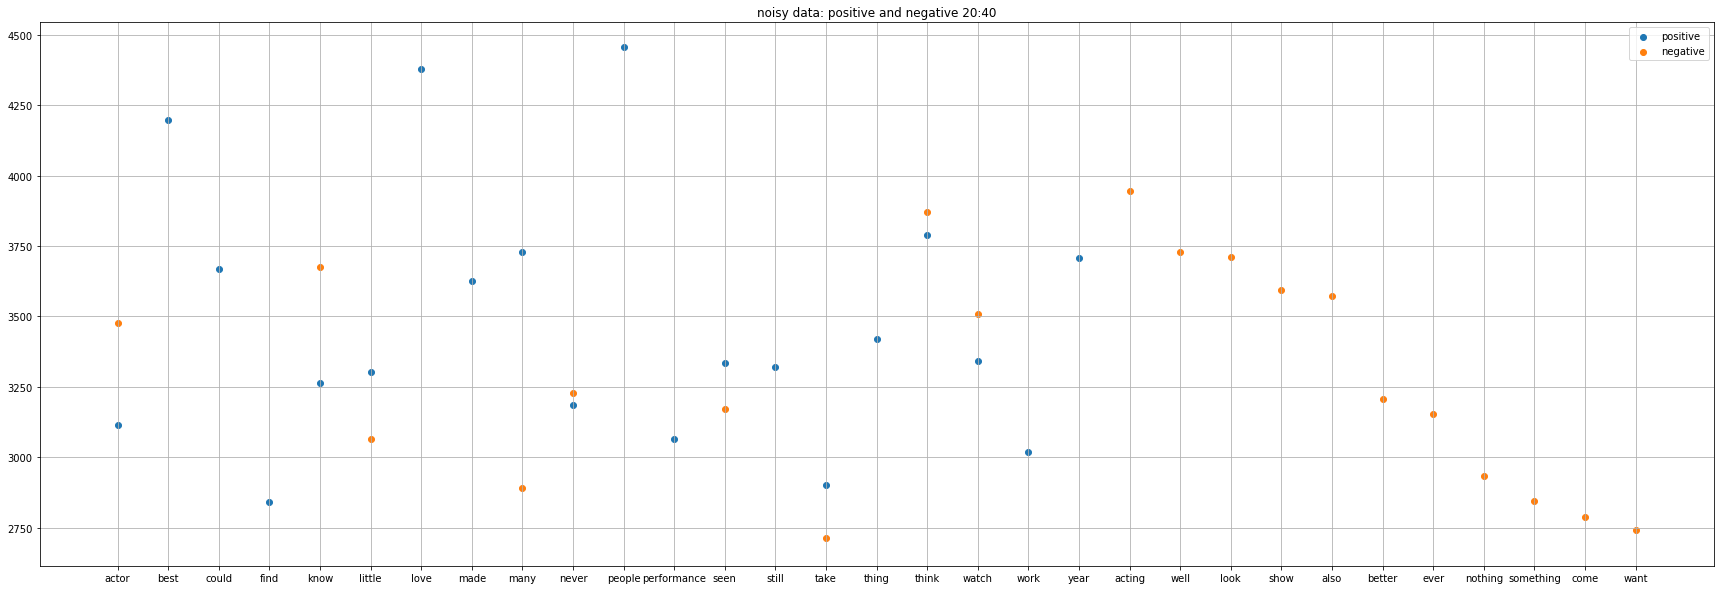

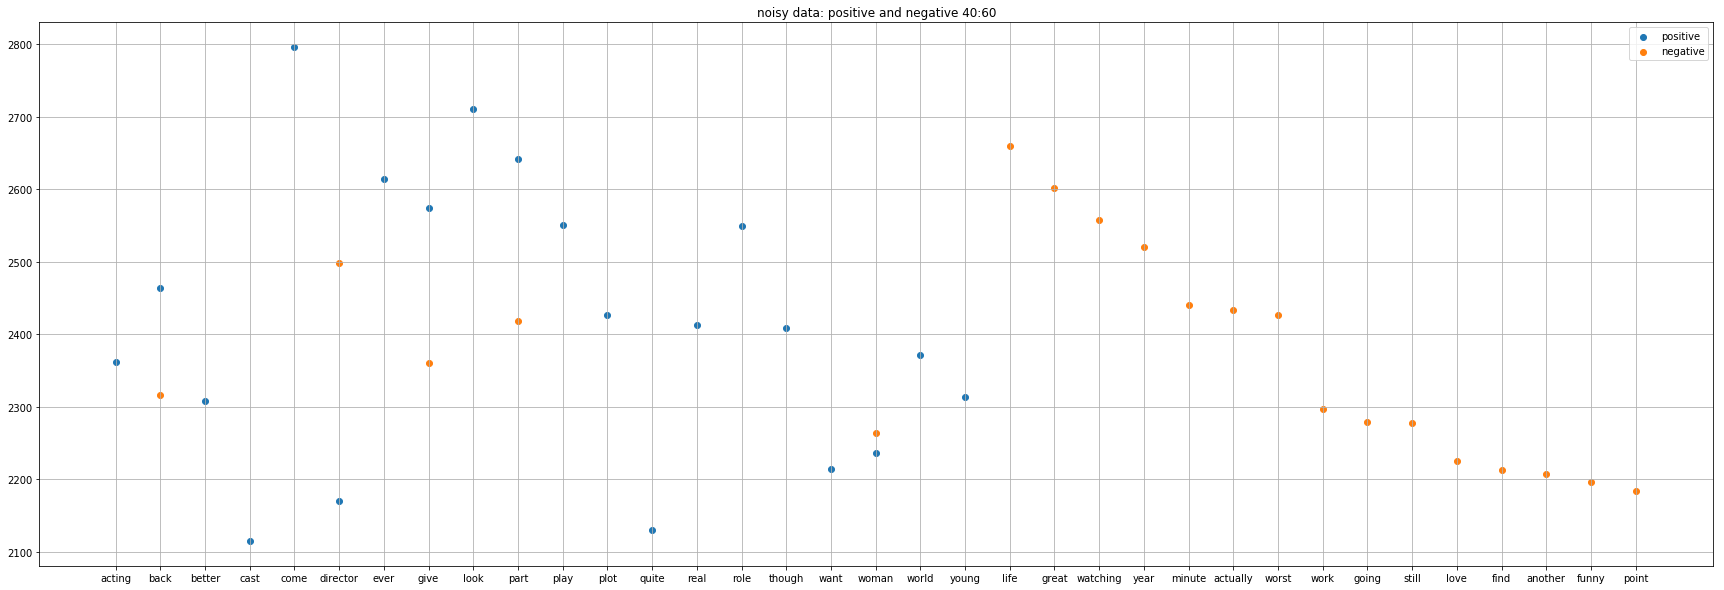

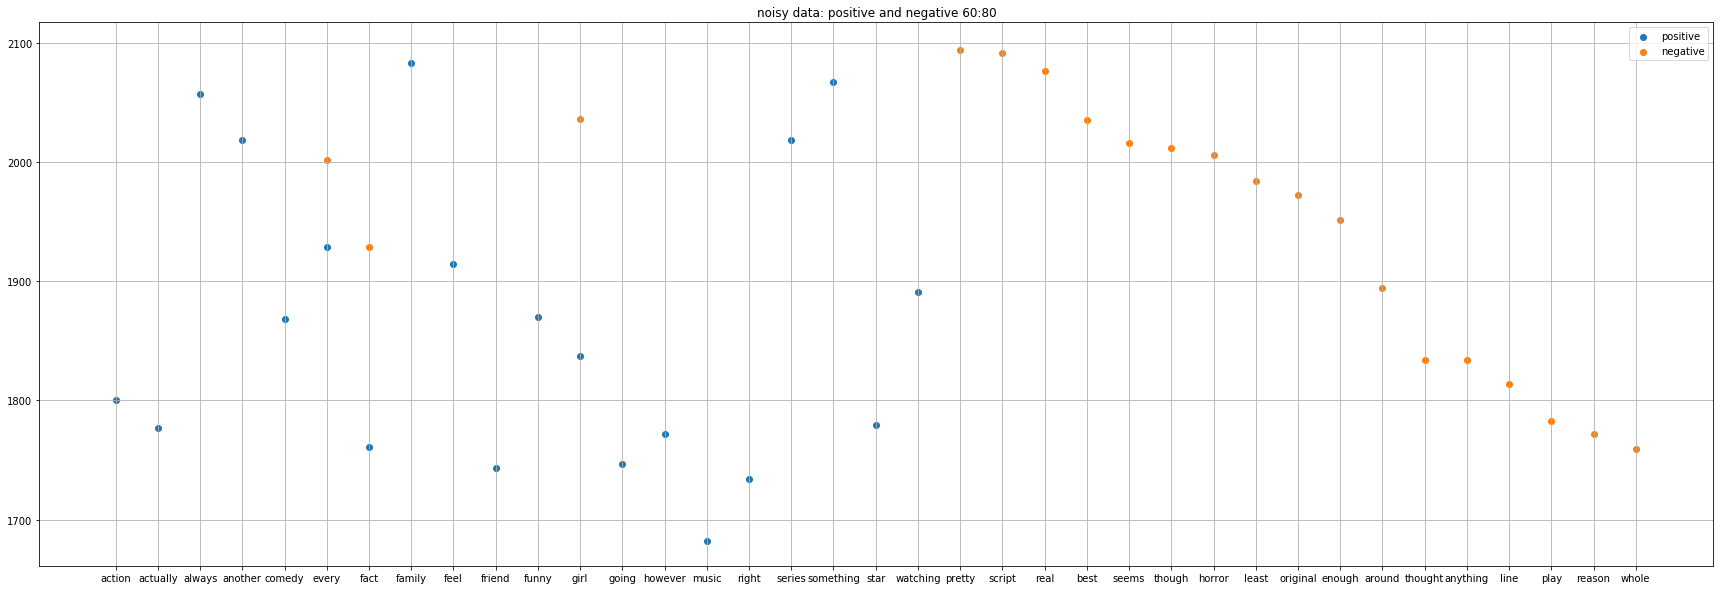

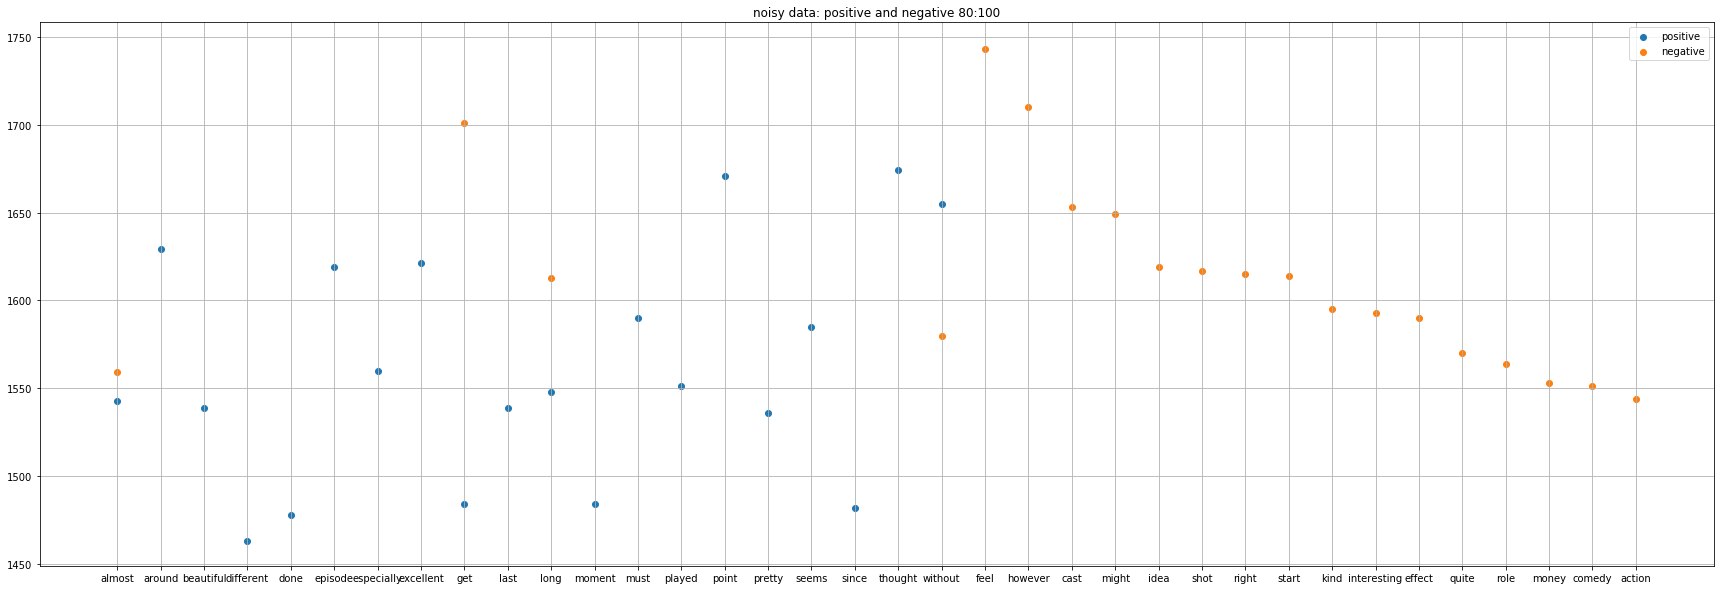

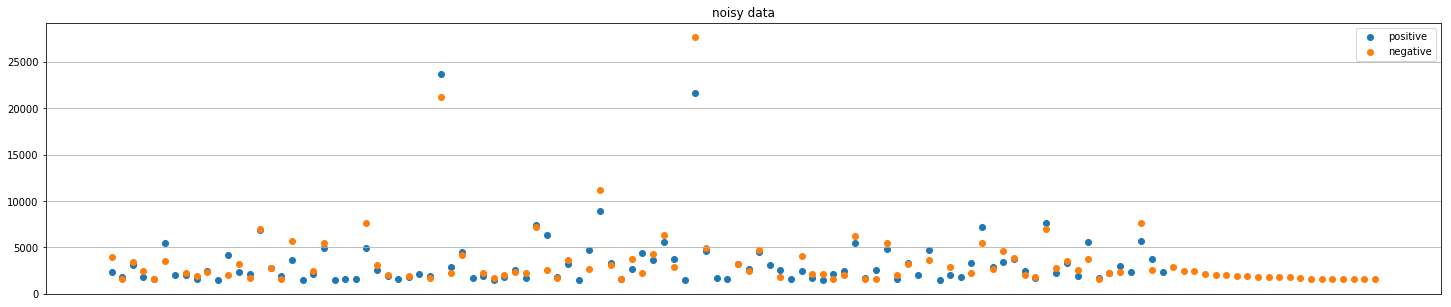

intersection : 80


In [352]:
def get_anz_vec(pos,neg):
    rep_pos_Anz = my_tokenizer(pos)
    rep_neg_Anz = my_tokenizer(neg)
    return [rep_pos_Anz,rep_neg_Anz]

def drowTokens(p,n):
    
    
    plt.figure(figsize=(30,10))
    plt.scatter(p[0][:20],p[1][:20])
    plt.scatter(n[0][:20],n[1][:20])
    plt.title("noisy data: positive and negative 0:20")
    plt.legend(["pos","neg"])
    plt.grid(True)
    plt.show()
    
    
    plt.figure(figsize=(30,10))
    plt.scatter(p[0][20:40],p[1][20:40])
    plt.scatter(n[0][20:40],n[1][20:40])
    plt.title("noisy data: positive and negative 20:40")
    plt.legend(["positive","negative"])
    plt.grid(True)
    plt.show()
    
    
    plt.figure(figsize=(30,10))
    plt.scatter(p[0][40:60],p[1][40:60])
    plt.scatter(n[0][40:60],n[1][40:60])
    plt.title("noisy data: positive and negative 40:60")
    plt.legend(["positive","negative"])
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(30,10))
    plt.scatter(p[0][60:80],p[1][60:80])
    plt.scatter(n[0][60:80],n[1][60:80])
    plt.title("noisy data: positive and negative 60:80")
    plt.legend(["positive","negative"])
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(30,10))
    plt.scatter(p[0][80:100],p[1][80:100])
    plt.scatter(n[0][80:100],n[1][80:100])
    plt.title("noisy data: positive and negative 80:100")
    plt.legend(["positive","negative"])
    plt.grid(True)
    plt.show()
    
    
    plt.figure(figsize=(25,5))
    plt.scatter(p[0],p[1])
    plt.scatter(n[0],n[1])
    plt.title("noisy data")
    plt.legend(["positive","negative"])
    plt.grid(True)
    plt.xticks([])
    plt.show()
    intersection = set.intersection(set(p[0]),set(n[0]))
    print("Intersection : "+str(len(intersection)))
    
rep_Anz = get_anz_vec(tok_pos,tok_neg)    
rep_pos_Anz = rep_Anz[0]
rep_neg_Anz = rep_Anz[1]

p = list(zip(*rep_pos_Anz))
n = list(zip(*rep_neg_Anz))


drowTokens(p,n)

# Analyzing the data - 100 most frequently tokens

Now we can see that the data is very noicy in other words the most frequently tokens (words) on the positive and the negative have very large intersection, 80 tokens,to get all the tokens that highly correlated to a positive or a negative sentiment. 

# Filtering 

After 20 itertion we have got some interasting distribution of the top 100 posisitive and the nagative the tokens tend to belong to specific sentiment and there is huge change from the first itertion and the intersection decrease to 5.

we can try different choose for the 100 most frequently token and we can change the chose for the number how trow the vertor if they in the intersection.

At first we try to test that approroch but we didn't get the acc that we where aming for (77%).
    <b> So we went with a different approroch using the TF-IDF function this function allowed us to esaily implement our own approroch that we talk about next.</b> 

In [ ]:
# pos_to_trow = set()
# neg_to_trow = set()

In [ ]:
# let's take a look on the intersection

# intersection = set.intersection(set(p[0]),set(n[0]))
# intersection_to_stopwords = set()


# pint = list(zip(p[0],p[1]))
# nint = list(zip(n[0],n[1]))
# for pos_tok in pint:
#     for neg_tok in nint:
#         if pos_tok[0]==neg_tok[0] and max(pos_tok[1],neg_tok[1])<2*min(pos_tok[1],neg_tok[1]):
#             token_to_trow = pos_tok[0]
#             intersection_to_stopwords.add(token_to_trow)
#             pos_to_trow.add(token_to_trow)
#             neg_to_trow.add(token_to_trow)
#             continue
#         if pos_tok[0]==neg_tok[0]:
#             print("save token : pos: "+pos_tok[0]+" neg: "+neg_tok[0]+" calc : "+str(pos_tok[1])+" - "+str(neg_tok[1]))
#             token_to_trow = pos_tok[0]
#             if pos_tok[0] == min(pos_tok[0],neg_tok[0]):
#                 pos_to_trow.add(token_to_trow)
#             else:
#                 neg_to_trow.add(token_to_trow)
              
           
            
            

# stopwords_set.update(intersection_to_stopwords)


# rep_Anz = get_anz_vec(tok_pos,tok_neg)    
# rep_pos_Anz = rep_Anz[0]
# rep_neg_Anz = rep_Anz[1]

# p = list(zip(*rep_pos_Anz))
# n = list(zip(*rep_neg_Anz))


#drowTokens(p,n)

In [440]:
# def myPosTokenCleaner(pos_text,stopwordpos):
    
#     pos_text = nltk.tokenize.word_tokenize(pos_text.lower())
#     cpos=[ s for s in pos_text if s not in stopwordpos ]
#     return cpos

# def myNegTokenCleaner(neg_text,stopwordneg):
#     neg_text = nltk.tokenize.word_tokenize(neg_text.lower())
#     cneg=[ s for s in neg_text if s not in stopwordneg ]
#     return cneg

# trainX=[]
# trainY=[]
# for i in range(len(trainv)):
#     if trainv[i][1]==1:
#         trainX.append(" ".join(myPosTokenCleaner(trainv[i][0],pos_to_trow)))
#         trainY.append(1)
#     else:
#         trainX.append(" ".join(myNegTokenCleaner(trainv[i][0],neg_to_trow)))
#         trainY.append(0)

In [441]:
# trainvec = list(zip(trainX,trainY))
# testvec = list(zip(Xtest,Ytest))

# np.random.shuffle(trainvec)
# np.random.shuffle(testvec)

# shuffle_trainv = list(zip(*trainvec))
# shuffle_testv = list(zip(*testvec))

# Let's Train It

We saw that when we try to "clean" the pos and neg train individually the acc wes bad 77%, then we use the TF-IDF to give a unuiq score to each token according to its appearance in a nagetive or a positive sentiment respectivly each document.

<b>We could do so since TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a our text, we than got a satisfying accuracy percentage wich stands on 88%.</b>    

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             sublinear_tf=True,
                             use_idf=True,stop_words=stopwords_set,ngram_range=(1,5))
train_vectors = vectorizer.fit_transform(shuffle_trainv[0])
test_vectors = vectorizer.transform(shuffle_testv[0])

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_vectors, shuffle_trainv[1])
print("Classification rate:", model.score(test_vectors, shuffle_testv[1]))

Classification rate: 0.892154899683633


In [13]:
# Fit the SVM model
model = svm.SVC(kernel='linear',C=15.0)
model.fit(train_vectors, shuffle_trainv[1])

SVC(C=15.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(shuffle_testv[1],model.predict(test_vectors)))

             precision    recall  f1-score   support

          0       0.87      0.89      0.88     12485
          1       0.89      0.87      0.88     12486

avg / total       0.88      0.88      0.88     24971



In [15]:
from sklearn import metrics
print(metrics.precision_score(shuffle_testv[1],model.predict(test_vectors)))

0.8871946220691916


In [16]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(shuffle_testv[1],model.predict(test_vectors)))

0.8782592418606958


In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(shuffle_testv[1],model.predict(test_vectors)))

0.8782587801850146


In [18]:
with open("vectorizer_C_15.pkl", 'wb') as handle:
                    pickle.dump(vectorizer, handle)

In [19]:
pickle.dump(model, open("SVM_model_C_15.pkl", 'wb'))